# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: 31
* Students: Dilara Günay, Derin Sinan Bursa, Othman Benchekroun, Sinan Gökçe
* Dataset: IMDb Films and Crew

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [2]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [3]:
# getting adjacency matrix
import pandas as pd
adjacency = pd.read_csv('data/adjacency.csv')
n_nodes = len(adjacency)
#Dropping useless column from adjacency dataframe
adjacency.drop('Unnamed: 0', axis = 1, inplace = True)
adjacency = adjacency.values
np.set_printoptions(suppress = True)
adjacency

array([[0.        , 0.16666667, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [4]:
D = np.zeros(shape=(n_nodes,n_nodes))
for i in range(n_nodes):
    sum = 0
    for j in range(n_nodes):
        sum = sum + adjacency[i,j]
    D[i,i]=sum
laplacian_combinatorial = D - adjacency #Some elements of spectral graph theory page 5

In [5]:
I = np.eye(n_nodes,n_nodes)
D_sqrt = scipy.linalg.fractional_matrix_power(D,-0.5)
laplacian_normalized = I-np.matmul(np.matmul(D_sqrt,adjacency),D_sqrt)

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [6]:
laplacian = laplacian_normalized

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [7]:
eigenvalues,eigenvectors = scipy.linalg.eigh(laplacian)
assert eigenvectors.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

**Answer:** Keeping in mind that our normalized graph Laplacian matrix (_laplacian__normalized_) is a real symmetrical matrix since the scipy.linalg.eigh is used to solve generalized eigenvalue problems, we have selected this eigensolver (_scipy.linalg.eigh_).

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Answer:** The matrix $S$ is the incidence matrix. <br>
$x^\top L x = x^\top SS^\top x = \|S^\top x\|_2^2 $ <br>
As such we obtain $S^\top x = \|(x^\top L x)\|_2 $  <br>
As we have $x^\top L x = \frac{1}{2}\sum W(i,j)(x[i]-x[j]) $ <br> 
Also we have $x^\top L x = \|(S^\top x)\|_2^2 $ <br>
This gives $\|(S^\top x)\|_2^2=\frac{1}{2}\sum W(i,j)(x[i]-x[j])$ <br>
Then we obtain $|S^\top x| = \frac{1}{\sqrt{2}} \sqrt{W(i,j)}|x[i]-x[j]| $

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**Answer:** <br>
So we get $ L u_k = \lambda_k u_k $ <br>
As the eigenvectors are normalized, we can write it as $ u_k^\top L u_k = \lambda_k$ <br>
Tt gives us $ u_k^\top L u_k =u_k^\top S^\top S u_k = \|S^\top u_k \|_2^2 = \lambda_k$

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

**Answer:** $S^\top $ is similar to a gradient. As such, it gives us information about the smoothness of x.

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

**Answer:** $x^\top L x = \frac{1}{2}\sum W(i,j)(x[i]-x[j])$ <br>
$u_k^\top L u_k = \frac{1}{2}\sum W(i,j)(u_k[i]-u_k[j])$ <br>
$u_0^\top L u_0 = \frac{1}{2}\sum W(i,j)(u_0[i]-u_0[j]) =0$ <br>
As such, for each pair of vertices $(i,j)$ connected by an edge, we have $u_0(i) = u_0(j)$.  Thus, the signal value $u_0$ for all vertice must be a constant.  We conclude that the eigenspace of eigenvalue 0 has constant signal value.

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

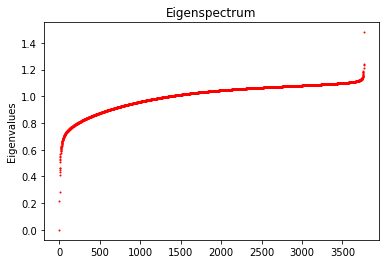

In [8]:
plt.plot(eigenvalues, 'ro', markersize = 1)
plt.title('Eigenspectrum')
plt.ylabel('Eigenvalues')
plt.show()

**Answer:** There is a increasing trend in our eigenspectrum as expected since the first eigenvalue is always equal 0 and for the next eigenvalues, the value increases afterwards considering that our graph is fully connected. However, this increase in eigenvalues loses its initial acceleration very rapidly.

How many connected components are there in your graph? Answer using the eigenvalues only.

In [9]:
#Multiplicity of eigenvalue 0 gives connectedness of graph
epsilon = 10**(-5)
print("There are {} connected components.".format(np.count_nonzero(eigenvalues<=epsilon)))

There are 1 connected components.


Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

**Answer** For normalized Laplacians, the upperbound on the eigenvalues is equal to 2 due to the IFF bipartite graph. Additionally, for combinatorial Laplacians, due to Gershgorin circle theorem, the upperbound is bounded by the largest absolute row sum or column sum of combinatorial Laplacian matrix considering all the eigenvalues lie in the union of all Gershorin circles.

## 2 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

**Answer:** Laplacian eigenmaps, and graph embeddings in general, are used to reduce the dimensionality of data while remaining truthful to the original data. Usually, embeddings are used for visualization (reduction to 2 or 3 dimensions) but also for computation (reduce to a single dimension).

This is done through the mapping of the graph to a vector space preserving the properties of the network.

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

**Explanation:** We only need $k=3$ eigenvectors as we work in $d=2$. Thus, we use the *scipy.sparse.linalg.eigs* to compute the first 3 eigenvectors. Following our research in the original [Laplacian Eigenmaps Paper](http://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf) (cf bottom of p.6), we need to drop the eigenvector corresponding to the first eigenvalue ($\lambda_1$) and pick the 2 next ones as our basis.

In [10]:
from scipy.sparse.linalg import eigs as sparse_eigs

lap_sparse_eigenvals, lap_sparse_eigenvecs = sparse_eigs(laplacian, k=3, which='SM')
lap_norm_sparse_eigenvecs = np.matmul(D_sqrt, lap_sparse_eigenvecs)
lap_sparse_eigenvecs

array([[ 0.04424308+0.j,  0.00174636+0.j, -0.00656872+0.j],
       [ 0.03683271+0.j, -0.00046388+0.j, -0.00837066+0.j],
       [ 0.03853629+0.j,  0.00098718+0.j, -0.00758299+0.j],
       ...,
       [ 0.0093388 +0.j,  0.0005193 +0.j, -0.002122  +0.j],
       [ 0.01111539+0.j,  0.00070297+0.j, -0.00342311+0.j],
       [ 0.01215639+0.j,  0.00058415+0.j, -0.00508719+0.j]])

In [11]:
#Only keep the 2 dimensions we need by leaving out the eigenvector corresponding to the "zero" eigenvalue
lap_sparse_eigenvecs = lap_sparse_eigenvecs[:,1:]
lap_norm_sparse_eigenvecs = lap_norm_sparse_eigenvecs[:,1:]
lap_sparse_eigenvecs

array([[ 0.00174636+0.j, -0.00656872+0.j],
       [-0.00046388+0.j, -0.00837066+0.j],
       [ 0.00098718+0.j, -0.00758299+0.j],
       ...,
       [ 0.0005193 +0.j, -0.002122  +0.j],
       [ 0.00070297+0.j, -0.00342311+0.j],
       [ 0.00058415+0.j, -0.00508719+0.j]])

Plot the nodes embedded in 2D. Comment on what you see.

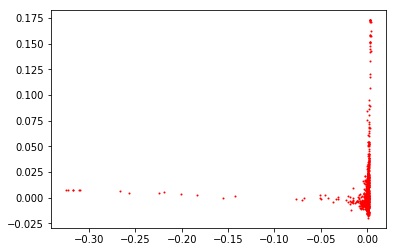

In [12]:
plt.plot(lap_sparse_eigenvecs[:,0].real, lap_sparse_eigenvecs[:,1].real, 'ro', markersize=1)
plt.show()

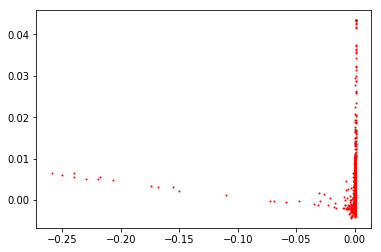

In [13]:
plt.plot(lap_norm_sparse_eigenvecs[:,0].real, lap_norm_sparse_eigenvecs[:,1].real, 'ro', markersize=1)
plt.show()

**Answer:** We prefer keeping the normalized values. Indeed, we can see more clearly the differerences in the data (upper right corner and line starting in the bottom right corner) as some clusters form. This is despite the fact that the values are closer to each other (_x_ ranges from $-0.3$ to $0$ instead of $-0.3$ to $0$, while _y_ ranges from $-0.025$ to $0.05$ instead of ranging up to $0.175$).

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**Answer:** The embedding $Z$ preserves similarity. As explained in the Slides, "we want similar points to be embedded to each other". Given that we work with graphs, this similarity is nothing but the distance in the projected space. 

## 3 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

**Answer:** In the eigenspectrum plotted in Question $6$, we see a clear gap between the first 3 eigenvalues and all of the others. Thus, we choose $k=3$ following the instructions on the Slides. ("If data has k clear clusters, there will be a gap in the Laplacian spectrum after the k-th eigenvalue. Use to choose k.").

On the other hand, we choose $d=2$ in order to have a better visualization. Note that we have tried working with $d=3$, but it does not give much more additional information (especially in the case of the normalized eigenvectors, given that all the points are on the same plane).

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

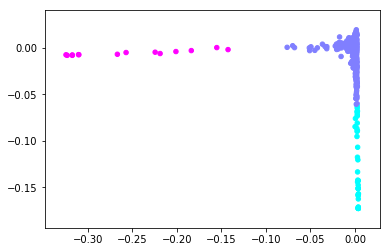

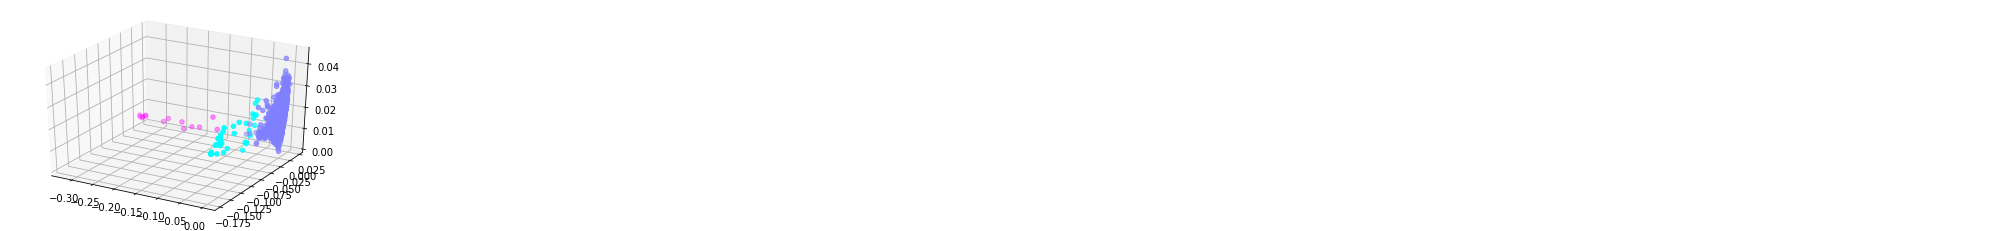

In [14]:
sparse_eigenvals, sparse_eigenvecs = sparse_eigs(laplacian, k=3, which='SM')
kmeans = KMeans(n_clusters=3).fit_predict(sparse_eigenvecs.real)
plt.scatter(sparse_eigenvecs[:,1].real, sparse_eigenvecs[:,2].real, c=kmeans, s=20, cmap='cool')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sparse_eigenvecs[:,1].real, sparse_eigenvecs[:,2].real, sparse_eigenvecs[:,0].real, c=kmeans, cmap='cool')

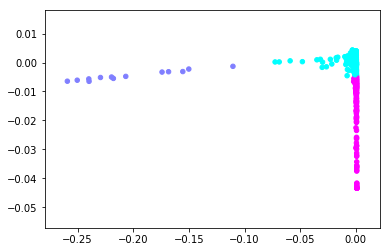

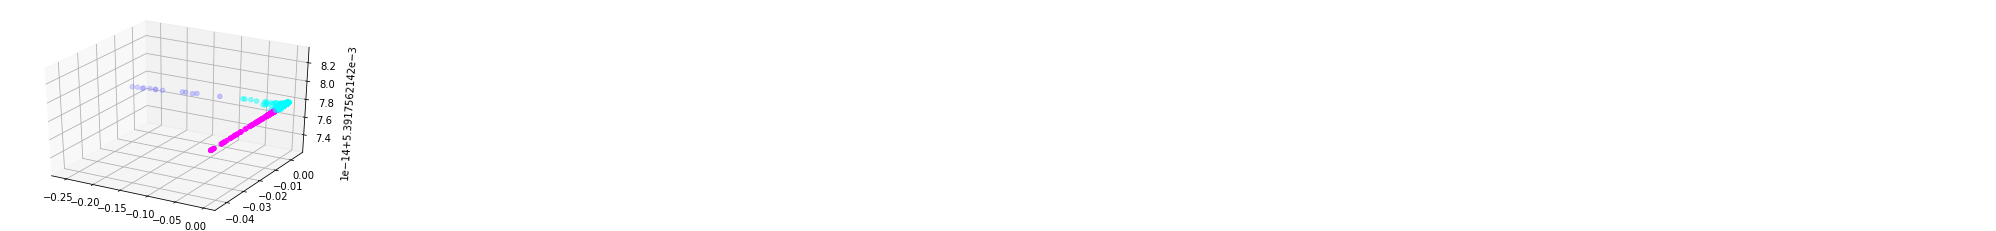

In [15]:
norm_sparse_eigenvecs = np.matmul(D_sqrt, sparse_eigenvecs)
norm_kmeans = KMeans(n_clusters=3).fit_predict(norm_sparse_eigenvecs.real)
plt.scatter(norm_sparse_eigenvecs[:,1].real, norm_sparse_eigenvecs[:,2].real, c=norm_kmeans, s=20, cmap='cool')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(norm_sparse_eigenvecs[:,1].real, norm_sparse_eigenvecs[:,2].real, norm_sparse_eigenvecs[:,0].real, c=norm_kmeans, cmap='cool')

**Explanation:** As told in the lecture, "normalization seeks to impose balanced clusters." This fact can be seen on the second 3-D plot. We choose using the eigenvectors which have not been re-normalized as the clusters are more straight-forward to understand, but also farthest from each other. Moreover, the K-means algorithm applied to the re-normalized eigenvectors is prone to initialization error (the assignment of points is different with each run).

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [16]:
x_idxs2, xi = zip(*sorted(zip(norm_kmeans,range(len(norm_kmeans)))))
y_idxs2, yi = zip(*sorted(zip(norm_kmeans,range(len(norm_kmeans)))))
ordered_adj = adjacency[xi,:][:,yi]
ordered_adj

array([[0.        , 0.16666667, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.08333333, ..., 0.08333333, 0.        ,
        0.        ],
       [0.33333333, 0.08333333, 0.        , ..., 0.        , 0.08333333,
        0.        ],
       ...,
       [0.        , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Answer:** Given the nature of clusters, we expect to see cliques appearing in the matrix. However, they will not be perfect as our network is comprised of a single connected component.

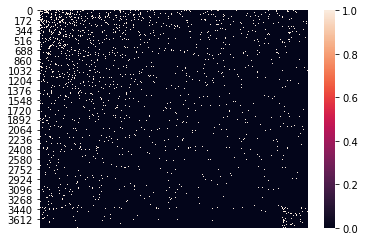

In [17]:
sns.heatmap(ordered_adj != 0, xticklabels=False)

**Answer:** This is indeed what we notice when looking at the heatmap of the ordered adjacency. We can see clearly the big rectangle representing the biggest cluster. However, we also notice that the rest of the matrix is not as tidy. Indeed, as expected, we notice some links between the biggest cluster and the others. But we cannot notice the smaller clusters, maybe because they are too small and cannot be considered as relevant ?

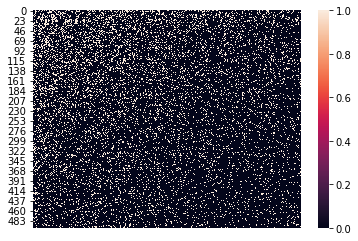

In [18]:
sns.heatmap(ordered_adj[:500,:500] != 0, xticklabels=False)

When zooming, we see that the only reason it didn't seem to have any ordering is because of the size of the cluster (around $350$ nodes only). We also notice that the $2^{nd}$ cluster is very small and very compact, as it is only comprised of around 15 nodes.

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

**Answer:** We do not have ground truth assignments, thus we look at the quality of clusters following the previous rearrangement of the adjacency matrix (cf Question 12). We can clearly see the 3 different clusters, showing the weak communities of our network.

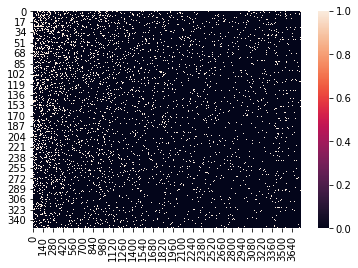

In [19]:
sns.heatmap(ordered_adj[:354] != 0)

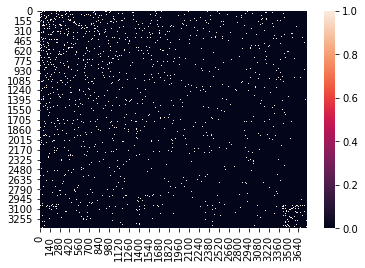

In [20]:
sns.heatmap(ordered_adj[363:] != 0)

However, we can question the existence of the $2^{nd}$ community, which is only constituted by around $15$ actors. When looking more closely, we see that this community is very strongly connected, while it is only very loosely connected to other nodes (which are far away).

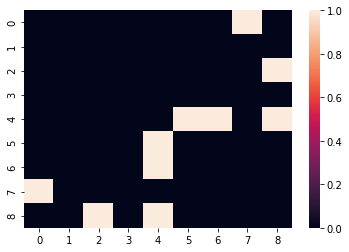

In [21]:
sns.heatmap(ordered_adj[354:363, 354:363] != 0)

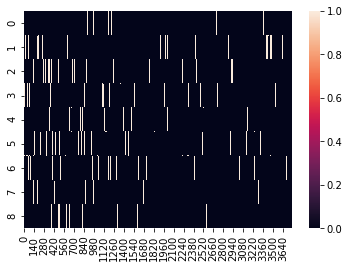

In [22]:
sns.heatmap(ordered_adj[354:363] != 0)

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

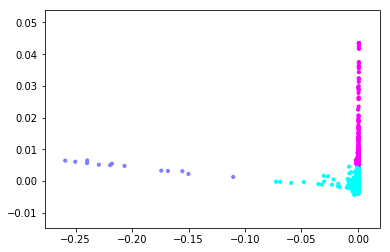

In [23]:
plt.scatter(lap_norm_sparse_eigenvecs[:,0].real, lap_norm_sparse_eigenvecs[:,1].real, c=norm_kmeans, cmap='cool', s=10)
plt.show()

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**Answer:** The idea behind using the eigenvectors of the graph Laplacian as features is similar as using Laplacian eigenmaps; it is the best way to reduce the dimensionality of the data in order to cluster it. 

More specifically, the eigenvectors splits the nodes into $\textit{k}$ clusters "blindly", meaning it uses $\textit{k}$ partition signals which depend on the distance between the nodes, which is represented by the feature vector comprised of the $\textit{k}$ first eigenvectors of the graph Laplacian.